In [ ]:
%pip install tensorflow

In [ ]:
%pip install matplotlib

In [ ]:
%pip install sklearn.utils

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, Flatten, LSTM
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
from keras.utils import np_utils

In [ ]:
num_words = 100000
max_review_len = 200

## Загрузка набора данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загружаем данные в память

Читаем данные из файла

In [ ]:
hotelDataset = pd.read_csv('drive/MyDrive/Datasets/hotel.csv')

In [ ]:
hotelDataset.head(1000)

,id,text,label
0,0,"Очень достойный отель с прекрасными номерами, ...",0
1,1,"Остановились в Барселоне проездом, т.к. нужно ...",0
2,2,Типичная сетевая гостиница. Главный плюс-шикар...,0
3,3,"Начнем с того, что в этом отеле не берут деньг...",-1
4,4,"Отель находится в отдалении от центра,но пешко...",1
...,...,...,...
995,995,Останавливались с мужем на неделю. Отель очень...,1
996,996,Хороший отель в историческом центре Барселоны....,0
997,997,Оставались в нем всего на одну ночь. В отеле о...,0
998,998,"Вполне достойный отель, в хорошем месте, уютны...",0


In [ ]:
phoneDataset = pd.read_csv('drive/MyDrive/Datasets/phone.csv')

In [ ]:
print(phoneDataset.iloc[24154])

id                                                   24154
text     не стоит он этих денег, тупит и тормозит с каж...
label                                                   -1
Name: 24154, dtype: object


In [ ]:
reviewsDataset = pd.read_csv('drive/MyDrive/Datasets/reviews.csv')

In [ ]:
reviewsDataset.head()

,id,label,text
0,0,"парфюм оригинальный . все , профессиональный ...",1
1,1,любимый dkny . запах просто шикарный . спасибо...,1
2,2,шикарный запах ! безумно нравиться ! не пожале...,1
3,3,иісі қатты ұнады .,1
4,4,"запах просто классный , то , нужно летний вр...",0


In [ ]:
wildberriesDataset = pd.read_csv('drive/MyDrive/Datasets/wildberries.csv')

In [ ]:
wildberriesDataset.head()

,id,text,label
0,0,"Всё норм. Мужу понравилось, как всегда.",1
1,1,Все пришло попробовал отлично,1
2,2,"Супер! Оригинал, выгодней намного чем в магази...",1
3,3,"Шикарные лезвия, 4 штуки в упаковке (фоткала у...",1
4,4,На первый взгляд очень даже хорошие кассеты. П...,1


In [ ]:
womenDataset = pd.read_csv('drive/MyDrive/Datasets/women.csv', lineterminator='\n')

In [ ]:
womenDataset.head()

,id,text,label
0,0,качество плохое пошив ужасный (горловина напер...,-1
1,1,"Товар отдали другому человеку, я не получила...",-1
2,2,"Ужасная синтетика! Тонкая, ничего общего с пре...",-1
3,3,"товар не пришел, продавец продлил защиту без...",-1
4,4,"Кофточка голая синтетика, носить не возможно.",-1


In [ ]:
concatDataset = pd.concat([hotelDataset, phoneDataset, reviewsDataset, wildberriesDataset, womenDataset])

In [ ]:
concatDataset = concatDataset.dropna()

In [ ]:
concatDataset.head(1000)

,id,text,label
0,0,"Очень достойный отель с прекрасными номерами, ...",0
1,1,"Остановились в Барселоне проездом, т.к. нужно ...",0
2,2,Типичная сетевая гостиница. Главный плюс-шикар...,0
3,3,"Начнем с того, что в этом отеле не берут деньг...",-1
4,4,"Отель находится в отдалении от центра,но пешко...",1
...,...,...,...
998,998,"Вполне достойный отель, в хорошем месте, уютны...",0
999,999,"Удобно расположенный отель. Рядом с метро, до ...",1
1000,1000,"Отель расположен близко от метро, до порта мы ...",1
1001,1001,Жили в отеле 3 дня. Отель действительно неплох...,0


In [ ]:
splitDataset = np.array_split(concatDataset, 2)

In [ ]:
train = splitDataset[0]

In [ ]:
train

,id,text,label
0,0,"Очень достойный отель с прекрасными номерами, ...",0
1,1,"Остановились в Барселоне проездом, т.к. нужно ...",0
2,2,Типичная сетевая гостиница. Главный плюс-шикар...,0
3,3,"Начнем с того, что в этом отеле не берут деньг...",-1
4,4,"Отель находится в отдалении от центра,но пешко...",1
...,...,...,...
348257,348257,Владею им уже 3-ю неделю и в целом впечатления...,1
348258,348258,"Аппарат не разочаровал, на БУ-рынке его цена к...",1
348259,348259,В целом не плохая и удобная модель со своими н...,0
348260,348260,"нормальный аппарат,шустрый,офис,интернет,почит...",0


In [ ]:
test = splitDataset[1]

In [ ]:
test

,id,text,label
348262,348262,"Несмотря на то, что книжки с него в метро можн...",-1
348263,348263,Казалось что компактность это хорошо. Но на де...,-1
348264,348264,Пользовался им ровно год. Покупал в начале 201...,0
348265,348265,HTC Touch2 - рабочая лошадка HTC все-таки моло...,1
348266,348266,Выбором я довольна. Стилусом почти не пользуюс...,1
...,...,...,...
89009,89009,сделано достаточно хорошо. на ткани сделан рис...,1
89010,89010,Накидка шикарная. Спасибо большое провдо линяе...,1
89011,89011,спасибо большое ) продовца рекомендую.. заказа...,1
89012,89012,Очень довольна заказом! Меньше месяца в РБ. К...,1


Выделяем данные для обучения

In [ ]:
reviews = train['text'].astype(str)

In [ ]:
reviews[:5]

0    Очень достойный отель с прекрасными номерами, ...
1    Остановились в Барселоне проездом, т.к. нужно ...
2    Типичная сетевая гостиница. Главный плюс-шикар...
3    Начнем с того, что в этом отеле не берут деньг...
4    Отель находится в отдалении от центра,но пешко...
Name: text, dtype: object

Выделяем правильные ответы

In [ ]:
train['label'].astype(int) + 1

0         1
1         1
2         1
3         0
4         2
         ..
348257    2
348258    2
348259    1
348260    1
348261    1
Name: label, Length: 404088, dtype: int64

In [ ]:
y_train = np_utils.to_categorical(train['label'].astype(int) + 1)

In [ ]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

## Токенизация текста

Создаем токенизатор Keras

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на отзывах

In [ ]:
tokenizer.fit_on_texts(reviews)

Преобразуем отзывы в числовое представление

In [ ]:
sequences = tokenizer.texts_to_sequences(reviews)

Ограничиваем длину отзывов

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_review_len)

In [ ]:
x_train[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

## Создаем нейронную сеть

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 512, input_length=max_review_len))
model.add(Conv1D(128, 8, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.3))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_save_path = 'best_model'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 512)          51200000  
                                                                 
 conv1d_3 (Conv1D)           (None, 193, 128)          524416    
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 2048)              264192    
                                                                 
 dropout_19 (Dropout)        (None, 2048)              0         
                                                      

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=4,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[checkpoint_callback])

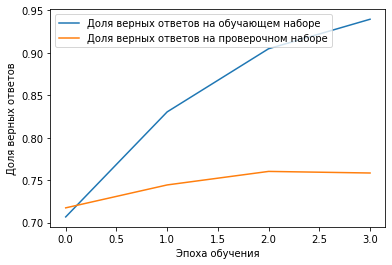

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Преобразуем тестовые отзывы в числовое представление

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['text'].astype(str))

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_review_len)

In [ ]:
x_test[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

Правильные ответы

In [ ]:
y_test = np_utils.to_categorical(test['Unnamed: 0'].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2)))

In [ ]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных

In [ ]:
model1.evaluate(x_test, y_test, verbose=1)

1560/1560 [==============================] - 10s 7ms/step - loss: 1.1818 - accuracy: 0.8211


[1.1817594766616821, 0.8211294412612915]

## Оцениваем тональность на примере из смешной таблички

In [ ]:
y_test1 = 'Ужасный сервис'

In [ ]:
sequence = tokenizer.texts_to_sequences([y_test1])

In [ ]:
data = pad_sequences(sequence, maxlen=max_review_len)

In [ ]:
result = model.predict(data)

1/1 [==============================] - 0s 18ms/step


In [ ]:
result

array([[9.9994838e-01, 5.8589239e-06, 4.5735014e-05]], dtype=float32)

In [ ]:
ans = result[0]

In [ ]:
ans

array([9.9994838e-01, 5.8589239e-06, 4.5735014e-05], dtype=float32)

In [ ]:
if ans[0] == max(ans):
    print('Отзыв отрицательный')
elif ans[1] == max(ans):
    print('Отзыв нейтральный')
else:
    print('Отзыв положительный')


Отзыв отрицательный
